In [1]:
import pandas as pd
import numpy as np

In [21]:
report_df = pd.read_csv('Data/Output/report_df.csv', header=None).T
report_df.columns = report_df.iloc[0]
report_df = report_df.drop(report_df.index[0])
report_df

,NaN,No,Yes,accuracy,macro avg,weighted avg
1,"GradientBoostingClassifier(ccp_alpha=0.0, crit...","{'precision': 0.9986421725239617, 'recall': 0....","{'precision': 0.0, 'recall': 0.0, 'f1-score': ...",0.9860021292535783,"{'precision': 0.49932108626198085, 'recall': 0...","{'precision': 0.9973033517414289, 'recall': 0...."


In [26]:
df = report_df

df['macro avg'].values.tolist()

["{'precision': 0.49932108626198085, 'recall': 0.49366288940656217, 'f1-score': 0.4964758671352274, 'support': 25361}"]

In [27]:
for col in df.columns:
    display(df[col].values.tolist())
    print('\n')

["GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,\n                           learning_rate=0.1, loss='deviance', max_depth=3,\n                           max_features=None, max_leaf_nodes=None,\n                           min_impurity_decrease=0.0, min_impurity_split=None,\n                           min_samples_leaf=1, min_samples_split=2,\n                           min_weight_fraction_leaf=0.0, n_estimators=100,\n                           n_iter_no_change=None, presort='deprecated',\n                           random_state=None, subsample=1.0, tol=0.0001,\n                           validation_fraction=0.1, verbose=0,\n                           warm_start=False)"]

["{'precision': 0.9986421725239617, 'recall': 0.9873257788131243, 'f1-score': 0.9929517342704548, 'support': 25327}"]

["{'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 34}"]

['0.9860021292535783']

["{'precision': 0.49932108626198085, 'recall': 0.49366288940656217, 'f1-score': 0.4964758671352274, 'support': 25361}"]

["{'precision': 0.9973033517414289, 'recall': 0.9860021292535783, 'f1-score': 0.9916205423235601, 'support': 25361}"]

In [28]:
!pip install yellowbrick

  Using cached https://files.pythonhosted.org/packages/13/95/a14e4fdfb8b1c8753bbe74a626e910a98219ef9c87c6763585bbd30d84cf/yellowbrick-1.1-py3-none-any.whl
You should consider upgrading via the 'pip install --upgrade pip' command.


In [29]:
import yellowbrick as yb

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [56]:
def classification_report(X, y, model, upsampled=False):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)


    classes = ["No", "Yes"]

    visualizer = ClassificationReport(model, classes=classes, support=True)
    visualizer.fit(X_train, y_train)
    print(visualizer.score(X_test, y_test))
    print(visualizer.scores_)

    return visualizer

In [48]:
import pandas as pd
import numpy as np
from itertools import combinations
from classifiers import classification_report, rocauc, pr_curve, confusion_matrix
from evaluate import evaluate_model, save_report
from sklearn.model_selection import train_test_split


from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.utils import resample

In [49]:
def load_data():
    '''
    Load training data and return pandas dataframe, x and y
    '''

    df = pd.read_csv('Data/training.csv')

    labels = df.columns[3:].tolist()

    X = df[labels].values
    y = df['purchase'].values

    return df, labels, X, y

df, labels, X, y = load_data()

/anaconda3/lib/python3.6/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


0.9867118804463546
{'precision': {'No': 0.98733478003551, 'Yes': 0.0}, 'recall': {'No': 0.9993610223642172, 'Yes': 0.0}, 'f1': {'No': 0.9933115014389203, 'Yes': 0.0}, 'support': {'No': 0.9873427703954891, 'Yes': 0.012657229604510864}}


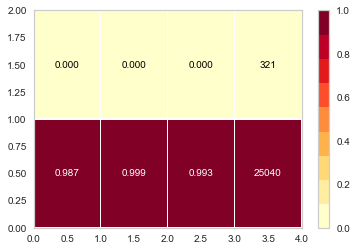

In [58]:
model_ = RandomForestClassifier()
class_report = classification_report(X, y, model_)

/anaconda3/lib/python3.6/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


0.9866330192027128

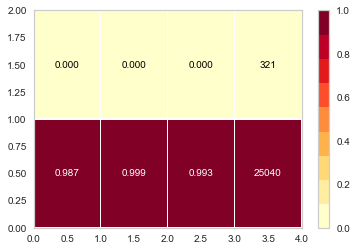

In [60]:
from yellowbrick.classifier import ClassificationReport

df, labels, X, y = load_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
model = RandomForestClassifier()

classes = ["No", "Yes"]

visualizer = ClassificationReport(model, classes=classes, support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

In [61]:
visualizer.scores_

{'precision': {'No': 0.9873337805311131, 'Yes': 0.0},
 'recall': {'No': 0.9992811501597444, 'Yes': 0.0},
 'f1': {'No': 0.9932715400035725, 'Yes': 0.0},
 'support': {'No': 0.9873427703954891, 'Yes': 0.012657229604510864}}

In [63]:
scores_ = visualizer.scores_

scores_

{'precision': {'No': 0.9873337805311131, 'Yes': 0.0},
 'recall': {'No': 0.9992811501597444, 'Yes': 0.0},
 'f1': {'No': 0.9932715400035725, 'Yes': 0.0},
 'support': {'No': 0.9873427703954891, 'Yes': 0.012657229604510864}}

In [85]:
report = pd.DataFrame(data=scores_.values()).T

report.columns = list(scores_.keys())
report

,precision,recall,f1,support
No,0.987334,0.999281,0.993272,0.987343
Yes,0.000000,0.000000,0.000000,0.012657


In [84]:
list(scores_.keys())

['precision', 'recall', 'f1', 'support']

In [97]:
array_report = np.array(report)

array_report

array([[0.98733378, 0.99928115, 0.99327154, 0.98734277],
       [0.        , 0.        , 0.        , 0.01265723]])

In [100]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                    z=[array_report[0], array_report[1]]))
fig.show()